In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
rng = np.random.default_rng()

In [2]:
#define the dimensions of the sample cyllinder
r_soil=30 #radius of soil sample mm
h_soil=40 #height of soil sample mm
r_detect=61/2 #radius of detector mm
z_top_detect=-5 #z-value of the top of the detector mm
z_bottom_detect=-5-62 #z-value of the bottom of the detector mm

Res=10**5 #Resolution of simulation

k_absorb=0.0037 #absorbtion coifecient of the detector (this is only a test value)

Planned_simulation_time = 1 #x 10min


In [3]:
%%time

Reslow=10**5 #defines the lower resolution to generate the points

#makes 2 random angles
theta, phi = np.random.rand(2,Reslow) 
#makes a unit vector in a random direction
Vectorlow = np.transpose(np.array([np.sin(theta*np.pi)*np.cos(phi*2*np.pi),np.sin(theta*np.pi)*np.sin(phi*2*np.pi),np.cos(theta*np.pi)]))


#array to store values
point_in_soil_low=np.zeros((Reslow,3))
#loop to fill the array
for i in range(Reslow):
        #sets value to initiate while loop
        testpoint=np.ones((3))*r_soil
        #checks if the point is in the cylinder
        while testpoint[0]**2+testpoint[1]**2>r_soil**2 or 0>testpoint[2] or testpoint[2]>h_soil:
            #makes a random point to be checked
            testpoint=np.array([np.random.rand()*r_soil,np.random.rand()*r_soil,np.random.rand()*h_soil])
        #puts the point in the array
        point_in_soil_low[i,:]=testpoint
        


CPU times: total: 1.14 s
Wall time: 1.19 s


In [4]:
%%time
#define lenth of arrays
N=int((60*Planned_simulation_time)//5)
#makes arrays to store values
EffeciencyArray=np.zeros(N)
EffeciencyGeoArray=np.zeros(N)

#loop 
for i in range(N):
    #generates random numbers
    randomlist=rng.integers(0,Reslow, (2,Res))
    
    #calls random points and direction from the generated set
    point_in_soil=point_in_soil_low[randomlist[0]]
    Vector=Vectorlow[randomlist[1]]

    #makes an empty array to store values
    combined_array = np.zeros((Res,10))
    #inputs the directions
    combined_array[:,:3]=Vector
    #inputs the points
    combined_array[:,3:6]=point_in_soil
    #renames to make writing out a bit easier
    x,y,z,x0,y0,z0= np.transpose(combined_array[:,:6])
    
    #calculates the discriminant for the infinite cylinder
    combined_array[:,6]=((x0*x+y*y0)**2-(x**2+y**2)*(x0**2+y0**2-r_detect**2))
    
    #if the discriminant is negative, return 0 to avoid squareroots of negative numbers
    combined_array[combined_array[:,6] < 0, 6] = 0

    #Find the lenth of the ray to enter the 
    combined_array[:, 7] = np.maximum(np.minimum((z_top_detect - combined_array[:,5])/combined_array[:,2],(z_bottom_detect - combined_array[:,5])/combined_array[:,2]),
                                    np.minimum((-(combined_array[:,0]*combined_array[:,3]+combined_array[:,1]*combined_array[:,4])-np.sqrt(combined_array[:,6]))/(combined_array[:,0]**2+combined_array[:,1]**2),
                                                                   (-(combined_array[:,0]*combined_array[:,3]+combined_array[:,1]*combined_array[:,4])+np.sqrt(combined_array[:,6]))/(combined_array[:,0]**2+combined_array[:,1]**2)))
    combined_array[combined_array[:,6] <= 0, 7] = 0

    combined_array[:, 8] = np.minimum(np.maximum((z_top_detect - combined_array[:,5])/combined_array[:,2],(z_bottom_detect - combined_array[:,5])/combined_array[:,2]),
                                    np.maximum((-(combined_array[:,0]*combined_array[:,3]+combined_array[:,1]*combined_array[:,4])-np.sqrt(combined_array[:,6]))/(combined_array[:,0]**2+combined_array[:,1]**2),
                                                                   (-(combined_array[:,0]*combined_array[:,3]+combined_array[:,1]*combined_array[:,4])+np.sqrt(combined_array[:,6]))/(combined_array[:,0]**2+combined_array[:,1]**2)))
    combined_array[combined_array[:,6] <= 0, 8] = 0

    combined_array[:,9] = combined_array[:,8]-combined_array[:,7]

    combined_array[combined_array[:, 7]<0, 9] = 0 
    combined_array[combined_array[:, 8]<combined_array[:, 7], 9] = 0 

    L=combined_array[:,9]
    LGeo=np.copy(L)
    LGeo[L>0] = 1

    print("Effeciency full[",i,"] =",np.sum(1-np.exp(-k_absorb*L))/Res)
    
    print("Effeciency geo[",i,"] =",np.sum(LGeo)/Res)
    
    EffeciencyArray[i]=np.sum(1-np.exp(-k_absorb*L))/Res
    EffeciencyGeoArray[i]=np.sum(LGeo)/Res
    
    
    
print("Effeciency full=",np.mean(EffeciencyArray), "±", np.std(EffeciencyArray)/np.sqrt(len(EffeciencyArray)))

print("Geometric Effeciency=",np.mean(EffeciencyGeoArray), "±", np.std(EffeciencyGeoArray)/np.sqrt(len(EffeciencyGeoArray)))

Effeciency full[ 0 ] = 0.03290704455820766
Effeciency geo[ 0 ] = 0.24088
Effeciency full[ 1 ] = 0.03304369175459712
Effeciency geo[ 1 ] = 0.24158
Effeciency full[ 2 ] = 0.033272215499044175
Effeciency geo[ 2 ] = 0.24347
Effeciency full[ 3 ] = 0.03346643605089092
Effeciency geo[ 3 ] = 0.24428
Effeciency full[ 4 ] = 0.03348711911542169
Effeciency geo[ 4 ] = 0.24451
Effeciency full[ 5 ] = 0.033282656490692175
Effeciency geo[ 5 ] = 0.24279
Effeciency full[ 6 ] = 0.03364776214380137
Effeciency geo[ 6 ] = 0.24452
Effeciency full[ 7 ] = 0.033515806557061566
Effeciency geo[ 7 ] = 0.24372
Effeciency full[ 8 ] = 0.0338657258920893
Effeciency geo[ 8 ] = 0.24598
Effeciency full[ 9 ] = 0.03346215706329038
Effeciency geo[ 9 ] = 0.24468
Effeciency full[ 10 ] = 0.033458149817217855
Effeciency geo[ 10 ] = 0.24423
Effeciency full[ 11 ] = 0.03371727046944639
Effeciency geo[ 11 ] = 0.24519
Effeciency full= 0.03342716961764671 ± 7.466627327430528e-05
Geometric Effeciency= 0.2438191666666667 ± 0.00040382280

In [5]:
%%time
#makes arrays to store values

def Sim(k_fit):
    #define lenth of arrays
    N=int((60*Planned_simulation_time)//5)
    #makes arrays to store values
    EffeciencyArray=np.zeros(N)
    EffeciencyGeoArray=np.zeros(N)
    
    #loop 
    for i in range(N):
        #generates random numbers
        randomlist=rng.integers(0,Reslow, (2,Res))
    
        #calls random points and direction from the generated set
        point_in_soil=point_in_soil_low[randomlist[0]]
        Vector=Vectorlow[randomlist[1]]

        #makes an empty array to store values
        combined_array = np.zeros((Res,10))
        #inputs the directions
        combined_array[:,:3]=Vector
        #inputs the points
        combined_array[:,3:6]=point_in_soil
        #renames to make writing out a bit easier
        x,y,z,x0,y0,z0= np.transpose(combined_array[:,:6])
    
        #calculates the discriminant for the infinite cylinder
        combined_array[:,6]=((x0*x+y*y0)**2-(x**2+y**2)*(x0**2+y0**2-r_detect**2))
    
        #if the discriminant is negative, return 0 to avoid squareroots of negative numbers
        combined_array[combined_array[:,6] < 0, 6] = 0

        #Find the lenth of the ray to enter the 
        combined_array[:, 7] = np.maximum(np.minimum((z_top_detect - combined_array[:,5])/combined_array[:,2],(z_bottom_detect - combined_array[:,5])/combined_array[:,2]),
                                    np.minimum((-(combined_array[:,0]*combined_array[:,3]+combined_array[:,1]*combined_array[:,4])-np.sqrt(combined_array[:,6]))/(combined_array[:,0]**2+combined_array[:,1]**2),
                                                                   (-(combined_array[:,0]*combined_array[:,3]+combined_array[:,1]*combined_array[:,4])+np.sqrt(combined_array[:,6]))/(combined_array[:,0]**2+combined_array[:,1]**2)))
        combined_array[combined_array[:,6] <= 0, 7] = 0

        combined_array[:, 8] = np.minimum(np.maximum((z_top_detect - combined_array[:,5])/combined_array[:,2],(z_bottom_detect - combined_array[:,5])/combined_array[:,2]),
                                    np.maximum((-(combined_array[:,0]*combined_array[:,3]+combined_array[:,1]*combined_array[:,4])-np.sqrt(combined_array[:,6]))/(combined_array[:,0]**2+combined_array[:,1]**2),
                                                                   (-(combined_array[:,0]*combined_array[:,3]+combined_array[:,1]*combined_array[:,4])+np.sqrt(combined_array[:,6]))/(combined_array[:,0]**2+combined_array[:,1]**2)))
        combined_array[combined_array[:,6] <= 0, 8] = 0

        combined_array[:,9] = combined_array[:,8]-combined_array[:,7]

        combined_array[combined_array[:, 7]<0, 9] = 0 
        combined_array[combined_array[:, 8]<combined_array[:, 7], 9] = 0 

        L=combined_array[:,9]
        LGeo=np.copy(L)
        LGeo[L>0] = 1

        #print("Effeciency full[",i,"] =",np.sum(1-np.exp(-k_fit*L))/Res)
    
        #print("Effeciency geo[",i,"] =",np.sum(LGeo)/Res)
    
        EffeciencyArray[i]=np.sum(1-np.exp(-k_fit*L))/Res
        EffeciencyGeoArray[i]=np.sum(LGeo)/Res
    
    Efficiency_res=np.mean(EffeciencyArray)
    Efficiency_uncert=np.std(EffeciencyArray)/np.sqrt(len(EffeciencyArray))
        
    return Efficiency_res, Efficiency_uncert
    
    
    


CPU times: total: 0 ns
Wall time: 0 ns


In [6]:
#measured effeciency's energies
Eff_Energy = np.array([
    238.63, 270.25, 295.24, 300.09, 328, 338.32, 351.93, 409.46, 463, 562.5, 
    583.19, 609.31, 661.66, 665.45, 727.33, 755.32, 763.13, 768.36, 772.29, 
    782.14, 794.95, 806.17, 830.49, 835.71, 840.38, 860.56, 904.2, 911.2, 
    934.06, 964.77, 968.97, 994.93, 1000.99, 1078.62, 1120.29, 1155.19, 
    1238.11, 1280.96, 1377.67, 1401.5, 1407.98, 1460.75, 1495.91, 1501.57, 
    1509.23, 1580.53, 1588.2, 1620.5, 1630.63, 1638.28, 1661.28, 1729.59, 
    1764.49, 1847.42, 2118.55, 2204.21, 2447.86, 2614.53])

#measured effeciency
Eff_measured = np.array([
    0.07863914, 0.095664076, 0.068889996, 0.073560801, 0.064823544, 0.061288655,
    0.055273812, 0.050257814, 0.048878811, 0.036874903, 0.012739734, 0.03373769,
    0.031907126, 0.028275956, 0.036303364, 0.038089398, 0.012390097, 0.03100052,
    0.024785013, 0.029212886, 0.029714037, 0.034786483, 0.020777823, 0.025280919,
    0.019054986, 0.010845103, 0.028779995, 0.029162185, 0.025041615, 0.026511601,
    0.026775279, 0.01206403, 0.018713049, 0.033445132, 0.022410073, 0.023664193,
    0.021361081, 0.02281539, 0.024794603, 0.019290749, 0.014962917, 0.00212166,
    0.023087339, 0.021171577, 0.023319976, 0.016417844, 0.019383774, 0.019402267,
    0.021754742, 0.021048137, 0.021711193, 0.026738214, 0.020011573, 0.021974167,
    0.01923418, 0.019459631, 0.026324342, 0.005256956
])

In [7]:
#bisection algorythm
def find_k(target_value, lower_bound, upper_bound):

    while True:
        mid = (lower_bound + upper_bound) / 2
        value, error = Sim(mid)
        
        
        if abs(value - target_value) <= error/2:
            return mid, error
        elif value < target_value:
            lower_bound = mid

        else:
            upper_bound = mid



In [8]:
%%time
k_simulated=np.zeros(len(Eff_measured))
k_simulated_error=np.zeros(len(Eff_measured))

#finding k-values to each energy

for i in range(len(Eff_measured)):
    print("working on Energy=", Eff_Energy[i], "keV")
    print("progress=", i*100//len(Eff_measured), "%")
    
    k_simulated[i]=find_k(Eff_measured[i], 0, 0.02)[0]
    k_simulated_error[i]=find_k(Eff_measured[i], 0, 0.02)[1]

working on Energy= 238.63 keV
progress= 0 %
working on Energy= 270.25 keV
progress= 1 %
working on Energy= 295.24 keV
progress= 3 %
working on Energy= 300.09 keV
progress= 5 %
working on Energy= 328.0 keV
progress= 6 %
working on Energy= 338.32 keV
progress= 8 %
working on Energy= 351.93 keV
progress= 10 %
working on Energy= 409.46 keV
progress= 12 %
working on Energy= 463.0 keV
progress= 13 %
working on Energy= 562.5 keV
progress= 15 %
working on Energy= 583.19 keV
progress= 17 %
working on Energy= 609.31 keV
progress= 18 %
working on Energy= 661.66 keV
progress= 20 %
working on Energy= 665.45 keV
progress= 22 %
working on Energy= 727.33 keV
progress= 24 %
working on Energy= 755.32 keV
progress= 25 %
working on Energy= 763.13 keV
progress= 27 %
working on Energy= 768.36 keV
progress= 29 %
working on Energy= 772.29 keV
progress= 31 %
working on Energy= 782.14 keV
progress= 32 %
working on Energy= 794.95 keV
progress= 34 %
working on Energy= 806.17 keV
progress= 36 %
working on Energy= 

In [9]:
# Define function to fit k(E)
def funk(x, a, b, c):
    return a/(x-b)+c

# Fit the exponential function to the data
popt, pcov = curve_fit(funk, Eff_Energy,k_simulated,  p0=[10,100,0.02])


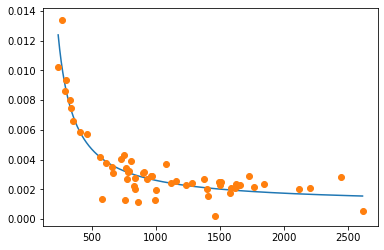

In [18]:
#plottting k(E)
å=np.linspace(np.min(Eff_Energy),np.max(Eff_Energy),1000)

plt.errorbar(Eff_Energy,k_simulated, yerr=k_simulated_error,fmt='None')
plt.plot(å,popt[0]/(å-popt[1])+popt[2])
plt.plot(Eff_Energy,k_simulated,"o")
plt.show()






In [11]:
%%time
#using the function to define an array of k's for each E

def k_from_E(x):
    a,b,c=popt
    return a/(x-b)+c

#the energies we simulate
Energy_array=np.linspace(200,2700,50)

#empty array for effeciencies
Eff=np.zeros(len(Energy_array))

#giving the corresponding k values
k_array=k_from_E(Energy_array)

#run the simulation to find effeciencies values
for i in range(len(Energy_array)):
    print(i*100//len(Energy_array),"%")
    Eff[i]=Sim(k_array[i])[0]

0 %
2 %
4 %
6 %
8 %
10 %
12 %
14 %
16 %
18 %
20 %
22 %
24 %
26 %
28 %
30 %
32 %
34 %
36 %
38 %
40 %
42 %
44 %
46 %
48 %
50 %
52 %
54 %
56 %
58 %
60 %
62 %
64 %
66 %
68 %
70 %
72 %
74 %
76 %
78 %
80 %
82 %
84 %
86 %
88 %
90 %
92 %
94 %
96 %
98 %
CPU times: total: 32 s
Wall time: 32.5 s


(0.09058327472400811, 0.00017338926454910742)

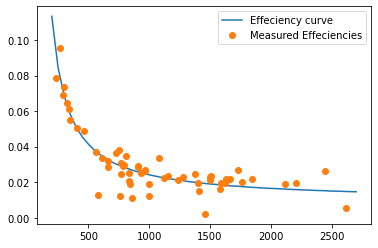

In [19]:
#plot effeciency curve
plt.plot(Energy_array,Eff, label="Effeciency curve")
#plot measured effeciencies
plt.plot(Eff_Energy,Eff_measured,"o",label="Measured Effeciencies")
plt.legend()

In [14]:
#coeficients to fit it
popt

array([1.45279147e+00, 1.11323277e+02, 9.66373554e-04])

In [15]:
L

array([62.00699807,  0.        ,  5.07984676, ...,  0.        ,
        0.        ,  0.        ])

In [16]:
N

12